<a href="https://colab.research.google.com/github/james-lucius/qworld/blob/main/QB23_Q20_Hadamard_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b>  <font color="blue"> Solution for </font>Hadamard Operator </b></font>
<br>
<br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

if in_colab():
    !pip install qiskit[visualization]==0.43.3
    !pip install qiskit-aer

<a name="task1"></a>
### Task 1

Remember that x-gate flips the value of a qubit.

Design a quantum circuit with a single qubit.

The qubit is initially set to $ \ket{0} $.

Set the value of qubit to $ \ket{1} $ by using x-gate.

Experiment 1: Apply one Hadamard gate, make measurement, and execute your program 10000 times.

Experiment 2: Apply two Hadamard gates, make measurement, and execute your program 10000 times.

Compare your results.

The following two diagrams represent these experiments.

<table>
    <tr>
        <td><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/photon/photon8.jpg" width="80%"></td>
        <td><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qbook101/images/ch2/photon/photon9.jpg" width="70%"></td>
    </tr>
</table>

<h3>Solution</h3>

<h4>Experiment 1: x-gate, h-gate, and measurement </h4>

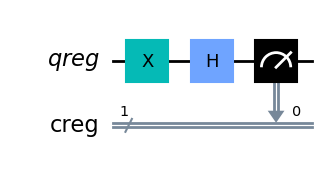

In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply x-gate to the first qubit
qc.x(q[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit
qc.h(q[0])

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [3]:
# execute the circuit and read the results
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)

counts = job.result().get_counts(qc)
print(counts)

{'1': 5006, '0': 4994}


<h4>Experiment 2: x-gate, h-gate, h-gate, and measurement </h4>

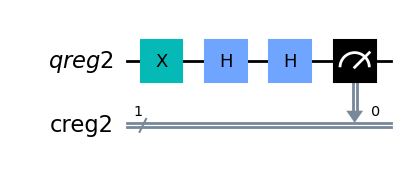

In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with one qubit
q2 =  QuantumRegister(1,"qreg2")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c2 = ClassicalRegister(1,"creg2")

# define our quantum circuit
qc2 = QuantumCircuit(q2,c2)

# apply x-gate to the first qubit
qc2.x(q2[0])

# apply h-gate (Hadamard: quantum coin-flipping) to the first qubit twice
qc2.h(q2[0])
qc2.h(q2[0])

# measure the first qubit, and store the result in the first classical bit
qc2.measure(q2,c2)


# draw the circuit by using matplotlib
qc2.draw(output='mpl') # re-run the cell if the figure is not displayed

In [5]:
# execute the circuit and read the results
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=10000)

counts2 = job.result().get_counts(qc2)
print(counts2)

{'1': 10000}
